In [1]:
import pandas as pd
import os
import matplotlib
import requests
%matplotlib inline

In [2]:
matplotlib.style.use('ggplot')

In [3]:
def check_ping(hosts):
    response = os.system('ping -c 1 {}'.format(hosts))
    if response == 0:
        return True
    else:
        return False    

In [4]:
def check_get(hosts):
    try:
        reply = requests.get('http://{}'.format(hosts))
        if reply.status_code == 200:
            return True
        else:
            return False
    except:
        return False

In [5]:
temp = pd.read_html('http://www.gad.gov.mm/my/%E1%80%9D%E1%80%94%E1%80%BA%E1%80%80%E1%80%BC%E1%80%AE%E1%80%B8%E1%80%8C%E1%80%AC%E1%80%94-website-%E1%80%99%E1%80%BB%E1%80%AC%E1%80%B8')

In [6]:
temp = temp[0]
temp = temp.iloc[1:,:]

In [7]:
hosts = temp [2]

In [8]:
hosts = pd.DataFrame(hosts)

In [9]:
hosts.columns = ['address']

In [10]:
hosts ['status'] = hosts.address.apply(check_get)

In [11]:
hosts.status.value_counts()

True     23
False    12
Name: status, dtype: int64

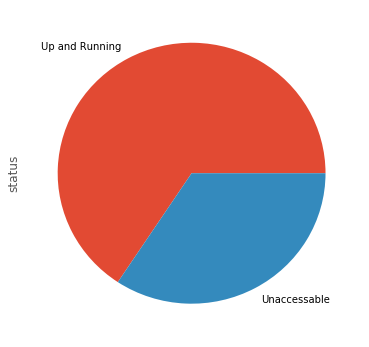

In [12]:
hosts.status.value_counts(normalize=True).plot(kind = 'pie',figsize=(6, 6), labels = ['Up and Running','Unaccessable'])

In [13]:
hosts.status.value_counts(normalize=True)

True     0.657143
False    0.342857
Name: status, dtype: float64